In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
sales=files.upload()

Saving sales_data_with_discounts.csv to sales_data_with_discounts.csv


In [3]:
sales = pd.read_csv('sales_data_with_discounts.csv')
sales

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


# Descriptive Analytics for Numerical Columns

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [5]:
# Identify numerical columns using the select_dtypes method
numerical_cols = sales.select_dtypes(include=[int, float])

# Print the numerical columns
print("Numerical columns:")
print(numerical_cols.columns)

Numerical columns:
Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [6]:
# Calculate mean, median, mode, and standard deviation for each numerical column
for col in numerical_cols.columns:
    mean = numerical_cols[col].mean()
    median = numerical_cols[col].median()
    mode = numerical_cols[col].mode()[0]  # Assuming we want the first mode if multiple exist
    std = numerical_cols[col].std()

    print('Column:', col)
    print('Mean:', mean)
    print('Median:', median)
    print('Mode:', mode)
    print('Standard Deviation:', std)
    print('------------------------')


Column: Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213923
------------------------
Column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993647
------------------------
Column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255325
------------------------
Column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.22060215332551
------------------------
Column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.902963353998
------------------------
Column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.65662406695
------------------------


In [ ]:
'''Median: The median returns the average value of each numeric column.
For example, the average price of the goods would be 10,453.43.
The average discount applied is about 15.16%, and the average selling price is 30,466.34.'''

'''Median: The median represents the mean value when the data is sorted, which is not very sensitive to outliers.
The sales ratio is 4, which means that half of the industry has 4 or less.
The total sales price is 5,700, indicating that half of the items sold have sales prices less than this amount.'''

'''Mode: Mode is the highest value that occurs in the data set.
Typical volume sold is 3 units.
The highest gross sales price is 24,300, which may indicate that a particular item or contract is often sold at this price.'''

'''Standard Deviation: This measures the spread or variability of data in the mean.
The higher prices (18,079.90) indicate greater variation in prices.
The standard deviation of the discount rate is 4.22, indicating some variability in the discounts offered.'''

# Data Visualization

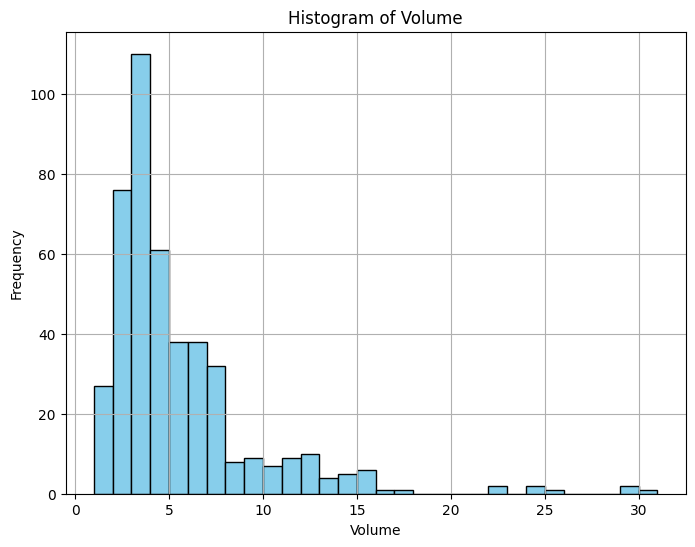

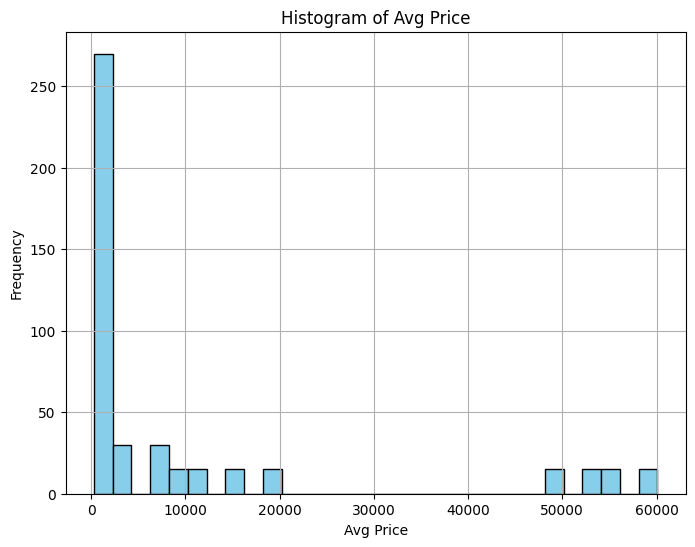

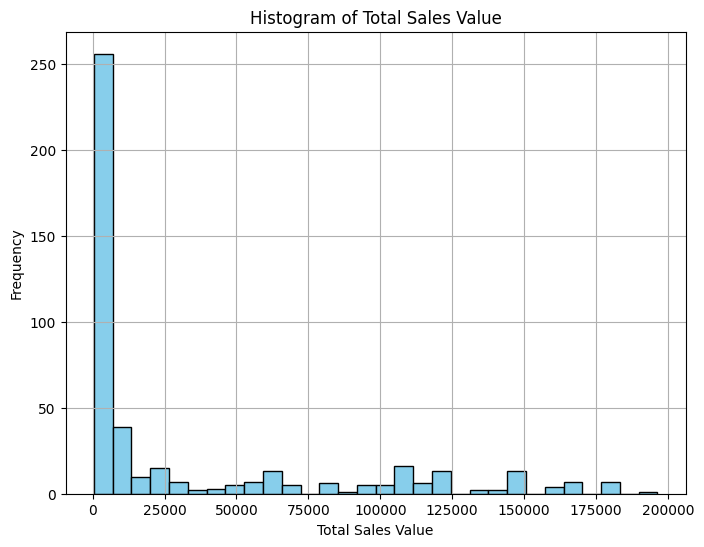

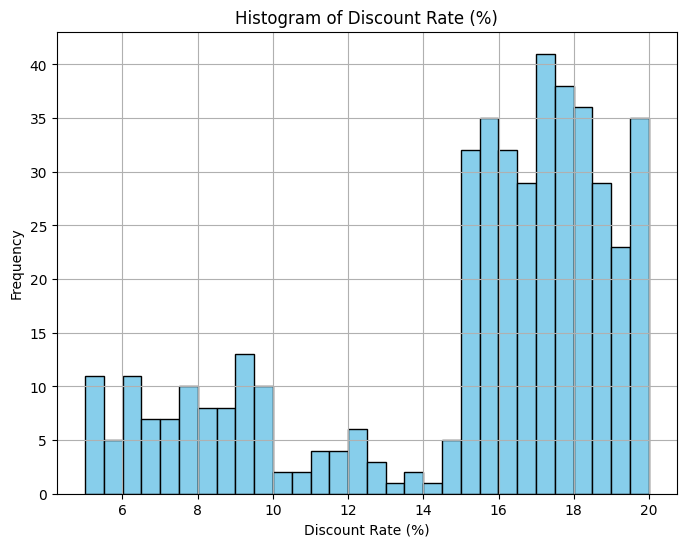

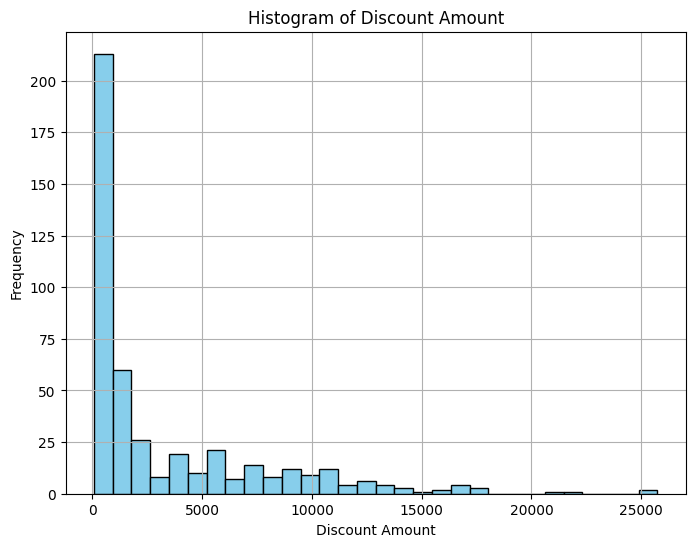

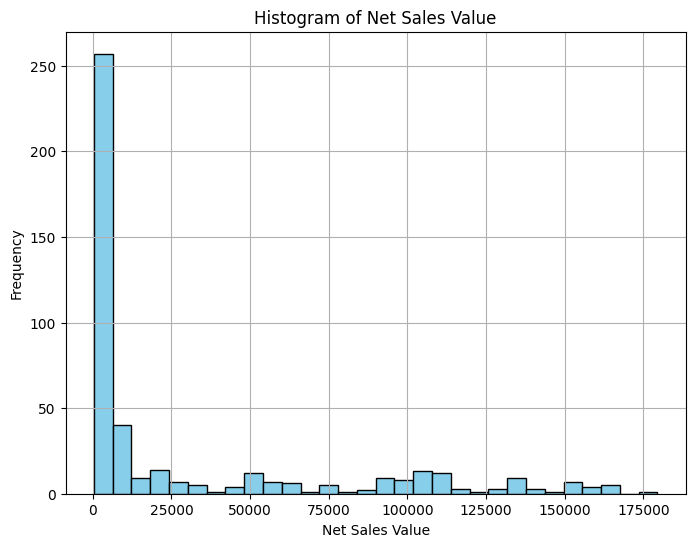

In [7]:
# Plot histograms for each numerical column
numerical_columns = sales.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(sales[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [8]:
# Calculate skewness for each numerical column
skewness_values = sales.skew(numeric_only=True)
print("Skewness Values:")
print(skewness_values)

Skewness Values:
Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64


In [9]:
def Empirical_Rule(x):
  for i in range(1,4):
    LL = x.mean() - (i*x.std())
    UL = x.mean() + (i*x.std())
    Countx = len([j for j in x if UL>=j>=LL])
    print(f"For Empirical Rule  {i} ")
    print('The lower limit of the data is:', LL)
    print('The upper limit of the data is:', UL)
    print('The count of data between the lower limit and upper limit is:', Countx)
    print(f"% of the data within the range:  {(Countx/len(x))*100:.2f}")
    print('\n')
  print('Outliers are:', [j for j in x if j<(x.mean() - 3*x.std()) or j>(x.mean() + 3*x.std())])

Empirical_Rule(sales['Total Sales Value'])

For Empirical Rule  1 
The lower limit of the data is: -16722.238616997696
The upper limit of the data is: 84347.9097281088
The count of data between the lower limit and upper limit is: 367
% of the data within the range:  81.56


For Empirical Rule  2 
The lower limit of the data is: -67257.31278955095
The upper limit of the data is: 134882.98390066205
The count of data between the lower limit and upper limit is: 416
% of the data within the range:  92.44


For Empirical Rule  3 
The lower limit of the data is: -117792.38696210418
The upper limit of the data is: 185418.0580732153
The count of data between the lower limit and upper limit is: 449
% of the data within the range:  99.78


Outliers are: [196400]


In [11]:
# Function to find outliers using IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers for all numerical columns
numerical_columns = sales.select_dtypes(include=['float64', 'int64']).columns

outliers_dict = {}
for column in numerical_columns:
    outliers = find_outliers_iqr(sales, column)
    outliers_dict[column] = outliers

# Display outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    if not outliers.empty:
        print(outliers)
        print('\n')
    else:
        print("No outliers found.")
    print("\n")

Outliers in Volume:
           Date        Day  SKU City  Volume         BU   Brand  \
0    01-04-2021   Thursday  M01    C      15    Mobiles   RealU   
10   01-04-2021   Thursday  F01    C      13       FMCG  Babaji   
30   02-04-2021     Friday  M01    C      11    Mobiles   RealU   
40   02-04-2021     Friday  F01    C      29       FMCG  Babaji   
50   02-04-2021     Friday  L01    C      13  Lifestyle   Jeera   
70   03-04-2021   Saturday  F01    C      24       FMCG  Babaji   
71   03-04-2021   Saturday  F02    C      14       FMCG   Vedic   
80   03-04-2021   Saturday  L01    C      12  Lifestyle   Jeera   
100  04-04-2021     Sunday  F01    C      25       FMCG  Babaji   
101  04-04-2021     Sunday  F02    C      15       FMCG   Vedic   
102  04-04-2021     Sunday  F03    C      11       FMCG   Vedic   
130  05-04-2021     Monday  F01    C      15       FMCG  Babaji   
140  05-04-2021     Monday  L01    C      14  Lifestyle   Jeera   
161  06-04-2021    Tuesday  F02    C      

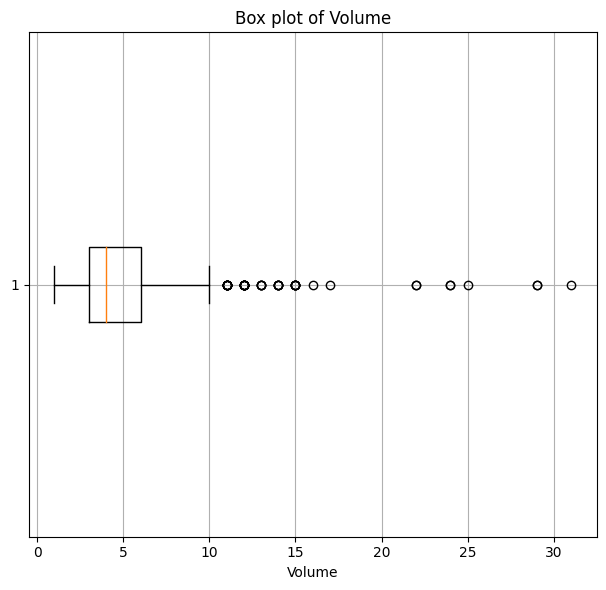

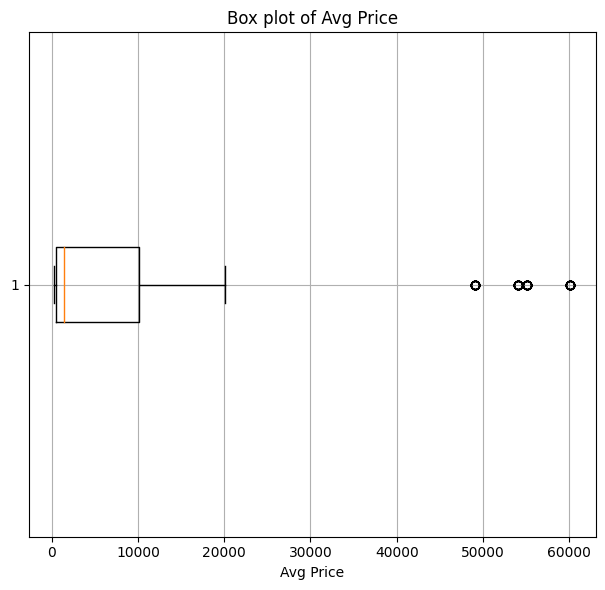

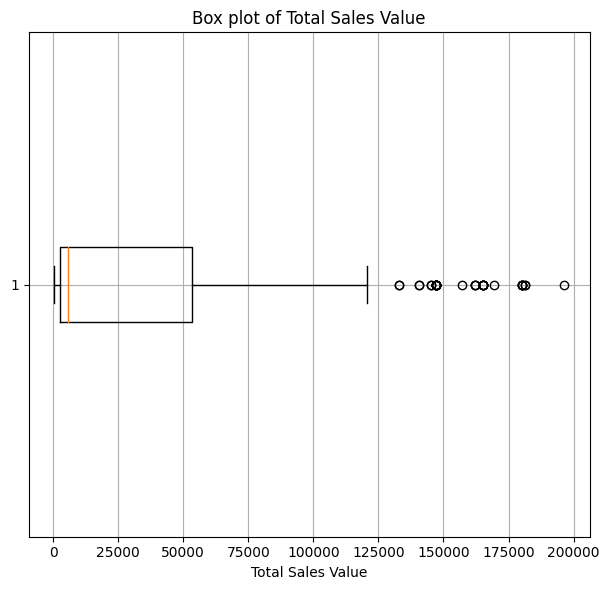

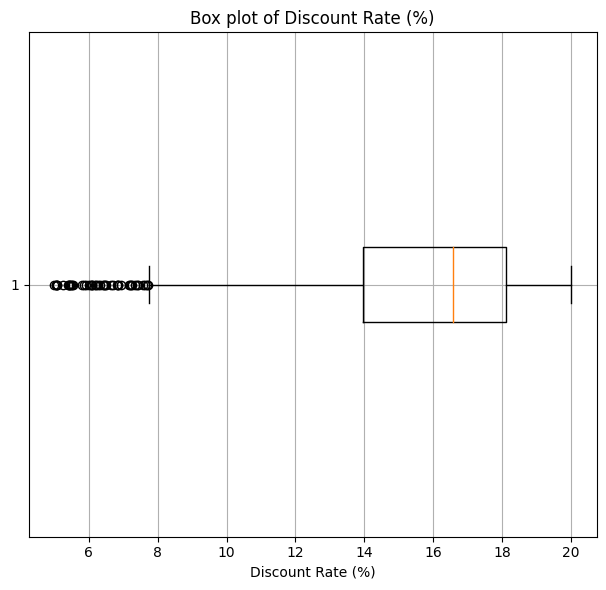

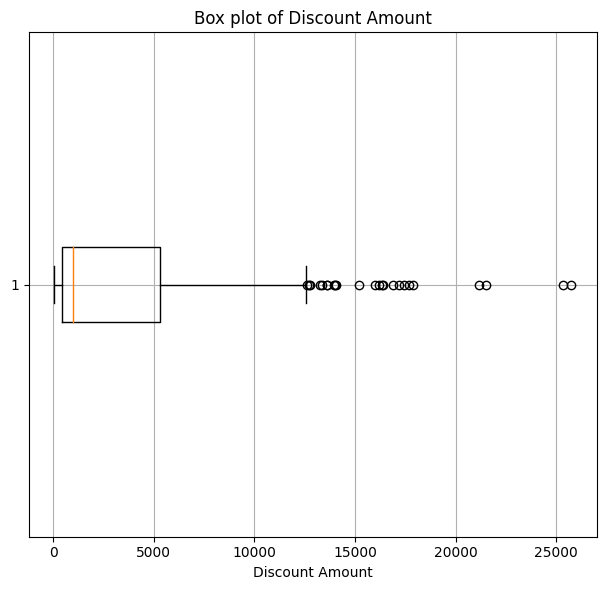

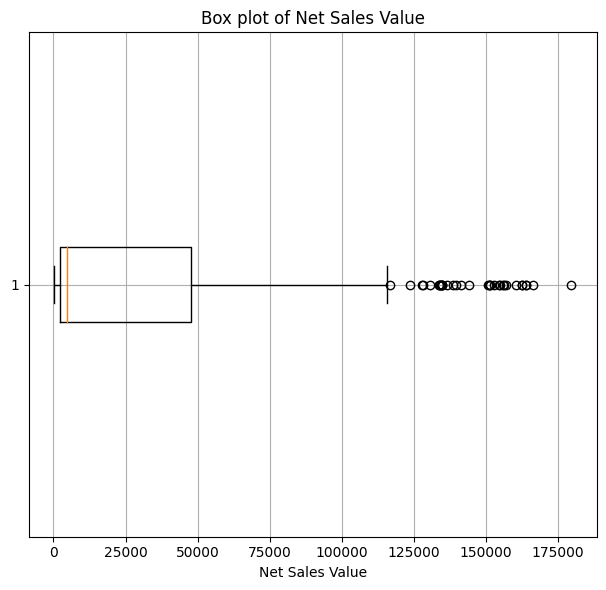

In [12]:
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    # Box plot
    plt.subplot(1, 2, 2)
    plt.boxplot(sales[column], vert=False)
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Based on the outliers and distributions identified through the box plots, here's a discussion of potential findings:

**1. Volume:**

*Outliers:* The Volume column contained significant outliers. Certain transactions, for instance, have quantities that are far over average (e.g., 45 units sold), and they are extraordinarily high.

*Inference:* These can be indicative of sales promotions or large purchases. To find out if these outliers are true business trends or oddities, it's critical to look at them more thoroughly.

**2. Average Price:**

*Outliers:* High outliers were found in the column labelled "Avg Price." Certain products, for example, are priced at 42,100, which is far more than the median price of 1,450.

*Conclusion:* The anomalies may point to the sale of expensive or high-end goods, or they may represent mistakes in data entry. Should these rates hold true, it implies that a minor portion of the merchandise is significantly more costly than the remainder.

**3. Total Sales Value:**

*Outliers:* The Total Sales Value displays outliers with abnormally high values, much like the Average Price does. 1,894,500 transactions imply that certain sales are significantly larger than typical.

*Inference:* High-volume or expensive items may be linked to these significant sales figures. It's critical to determine whether these are indicative of exceptional circumstances, such as corporate sales or large purchases, which may require a different analysis than typical sales.

**4. Discount Rate (%):**

*No Outliers:* Interestingly, the Discount Rate column does not show any outliers. However, the skewness analysis showed a slight negative skew, indicating that higher discount rates are more common.

*Inference:* The absence of outliers suggests that discount rates are generally within a consistent range. The negative skew indicates a strategy of offering higher discounts more frequently, possibly to boost sales.

**5. Discount Amount:**

*Outliers:* There are outliers in the Discount Amount, which correspond with high-value transactions. Large discounts (e.g., 10,328) are associated with high-priced items.

*Inference:* Large discount amounts are likely tied to premium products or bulk sales. Such discounts may be part of promotional strategies or negotiations for large orders.

**6. Net Sales Value:**

*Outliers:* The Net Sales Value also has outliers, typically aligned with high Total Sales Value and Avg Price. Transactions with net sales values exceeding typical ranges (e.g., over 1,884,171) indicate unusually large sales.

*Inference:* These outliers likely reflect large-scale transactions. Understanding the context of these transactions is key—whether they represent high-volume sales, expensive products, or special deals.

**General Findings:**

*Extreme Values:* The outliers identified in the Volume, Avg Price, Total Sales Value, Discount Amount, and Net Sales Value columns indicate that while most transactions fall within a typical range, there are occasional extreme values. These could represent important business events like bulk sales or sales of high-value products.

*Unusual Distributions:* The skewness and presence of outliers suggest that the data has an uneven distribution, with most transactions being small or average, but a few being exceptionally large. This pattern is typical in retail and sales data, where a few high-value transactions can significantly impact overall sales.

In [13]:
# Identify categorical columns
categorical_columns = sales.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


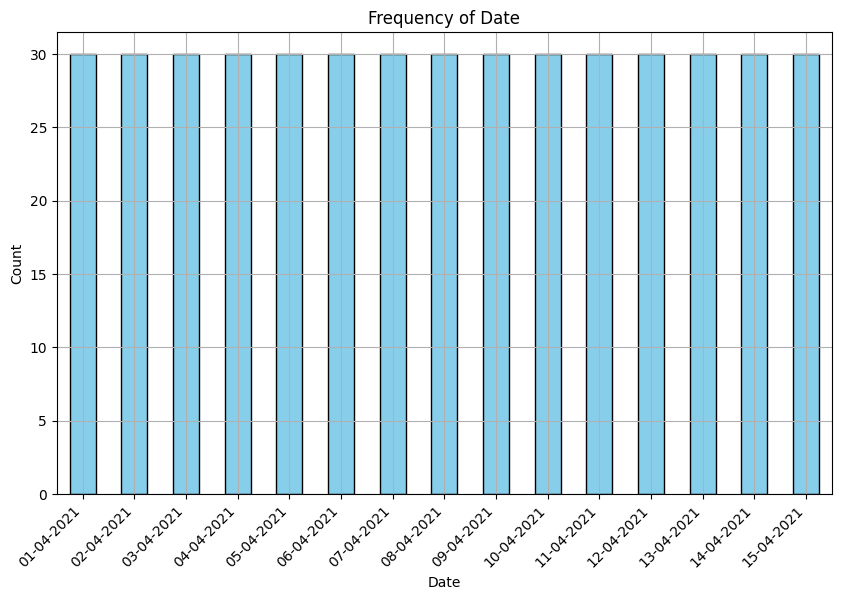

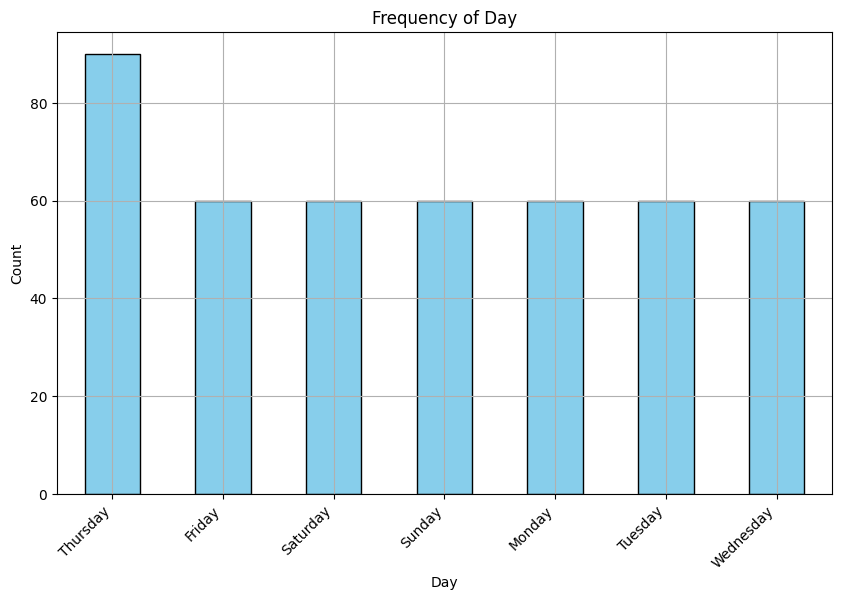

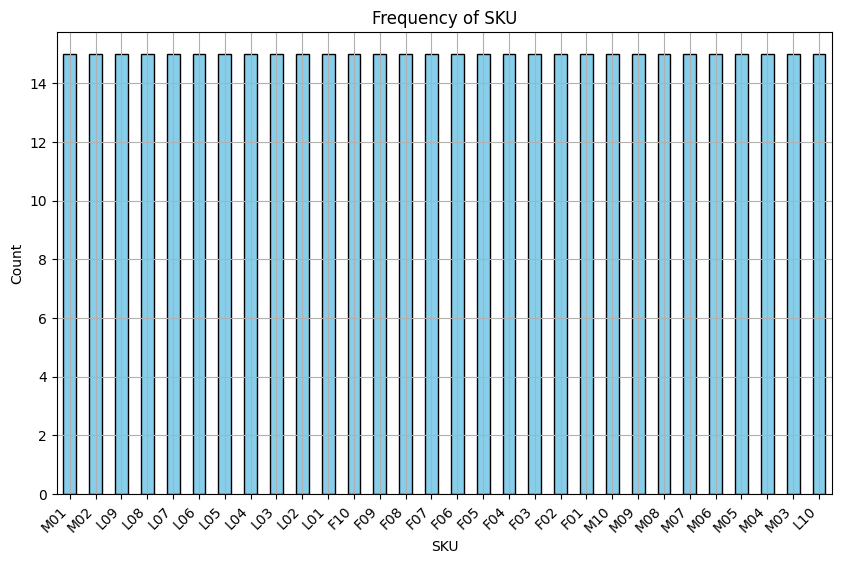

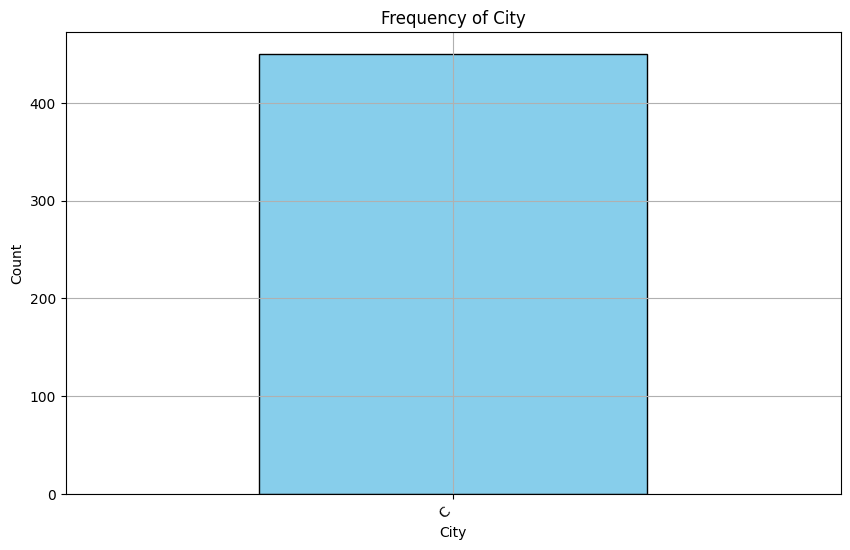

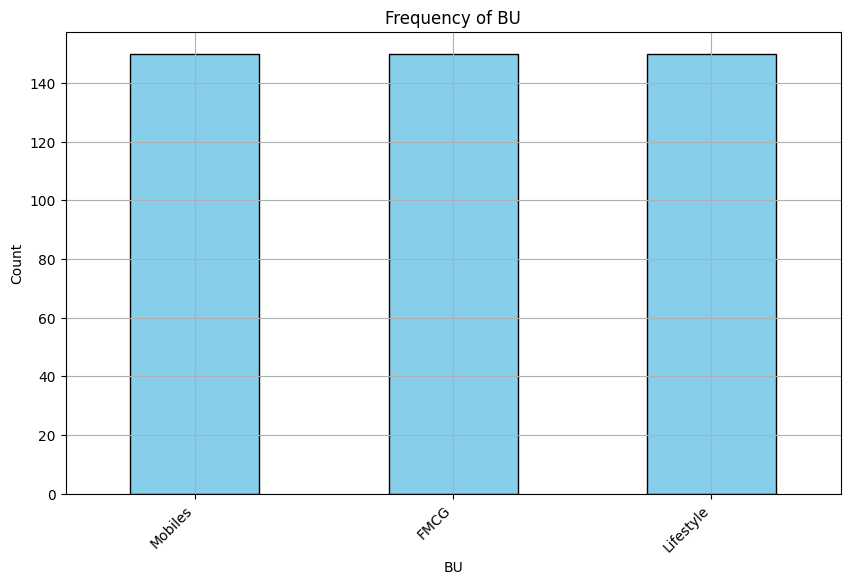

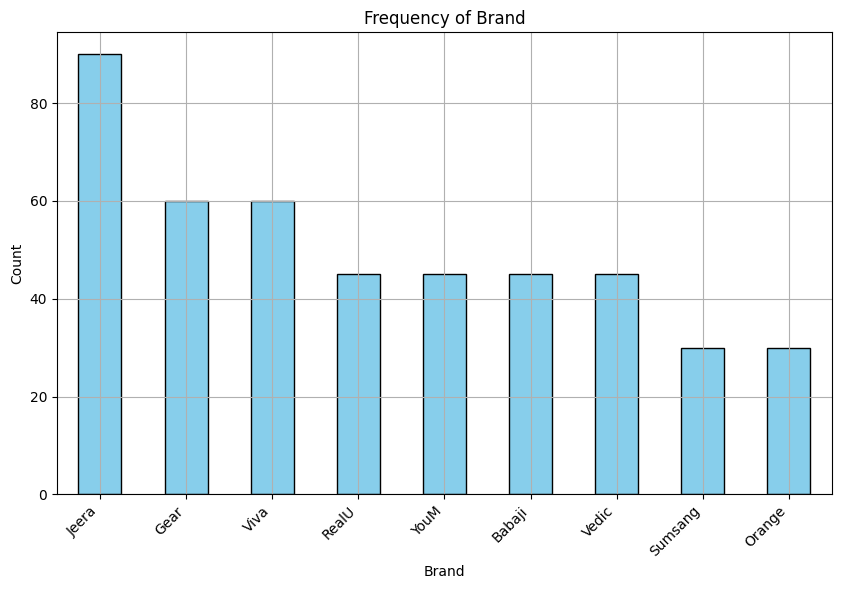

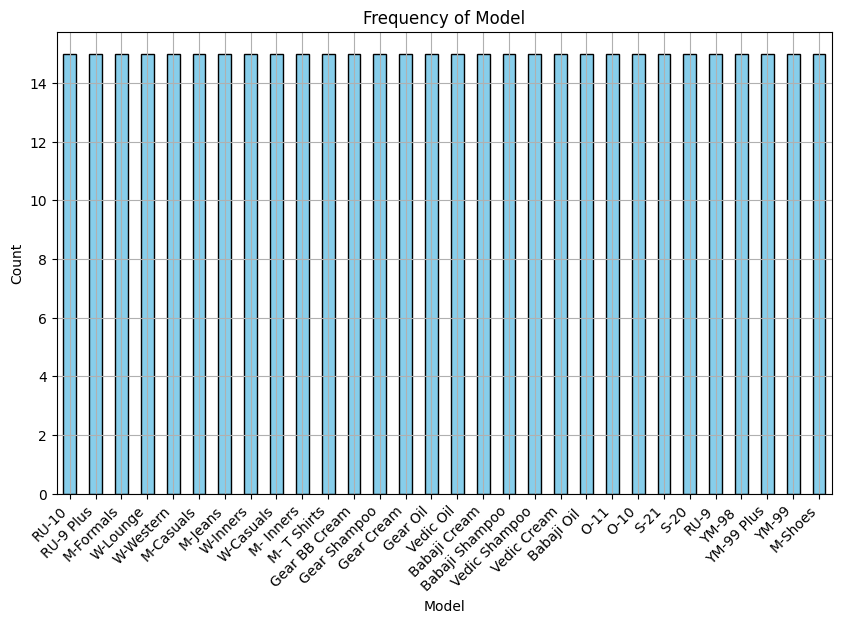

In [14]:
# Plot bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sales[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

# Sample Analysis

**City:** The chart shows that one city has significantly more sales than others, this city is a key market for the business. Less frequent cities represent opportunities for growth or markets that require further investigation.

**Brand:** One brand dominates, it is the most popular among customers. Brands with lower frequencies are either be less popular or represent premium/niche products.

**BU (Business Unit):** One business unit has much higher sales than others, this unit is the primary focus of the business. Units with lower sales need more attention or could represent niche markets.

This analysis provides insights into where the business is most active and which products, cities, or brands are driving sales. It can help in making strategic decisions, such as where to focus marketing efforts or how to diversify product offerings.

# Standardization of Numerical Variables

**Concept of Standardization (Z-Score Normalization)**

Standardization is a technique used to normalize the values of a numerical dataset to have a mean of zero and a standard deviation of one. This process, also known as Z-score normalization, transforms the data such that it follows a standard normal distribution.

**Why Standardize?**

*Comparison Across Scales:* Different numerical features can have different units and scales, which can affect the performance of machine learning algorithms. Standardization brings all features to a common scale, making them comparable.

*Improves Algorithm Performance:* Some algorithms, such as k-nearest neighbors (KNN) and principal component analysis (PCA), are sensitive to the scale of the data. Standardization can improve their performance.

*Handles Outliers:* While standardization doesn't remove outliers, it can help reduce their impact by scaling the data.

**The formula to standardize a value x is:**

 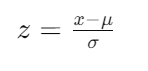

Where:

x = the original data value.

μ = the mean of the dataset.

σ = the standard deviation of the dataset.

z = the standardized value (Z-score).

In [15]:
# Standardize the numerical columns
standardized_data = sales.copy()
for column in numerical_columns:
    mean = sales[column].mean()
    std = sales[column].std()
    standardized_data[column] = (sales[column] - mean) / std

# Display original and standardized data (first 5 rows for comparison)
comparison = pd.concat([sales[numerical_columns].head(), standardized_data[numerical_columns].head()], axis=1)
comparison.columns = [f'{col}_original' for col in numerical_columns] + [f'{col}_standardized' for col in numerical_columns]
print(comparison)

   Volume_original  Avg Price_original  Total Sales Value_original  \
0               15               12100                      181500   
1               10               10100                      101000   
2                7               16100                      112700   
3                6               20100                      120600   
4                3                8100                       24300   

   Discount Rate (%)_original  Discount Amount_original  \
0                   11.654820              21153.498820   
1                   11.560498              11676.102961   
2                    9.456886              10657.910157   
3                    6.935385               8364.074702   
4                   17.995663               4372.946230   

   Net Sales Value_original  Volume_standardized  Avg Price_standardized  \
0             160346.501180             2.347417                0.091072   
1              89323.897039             1.165831               -0.019548

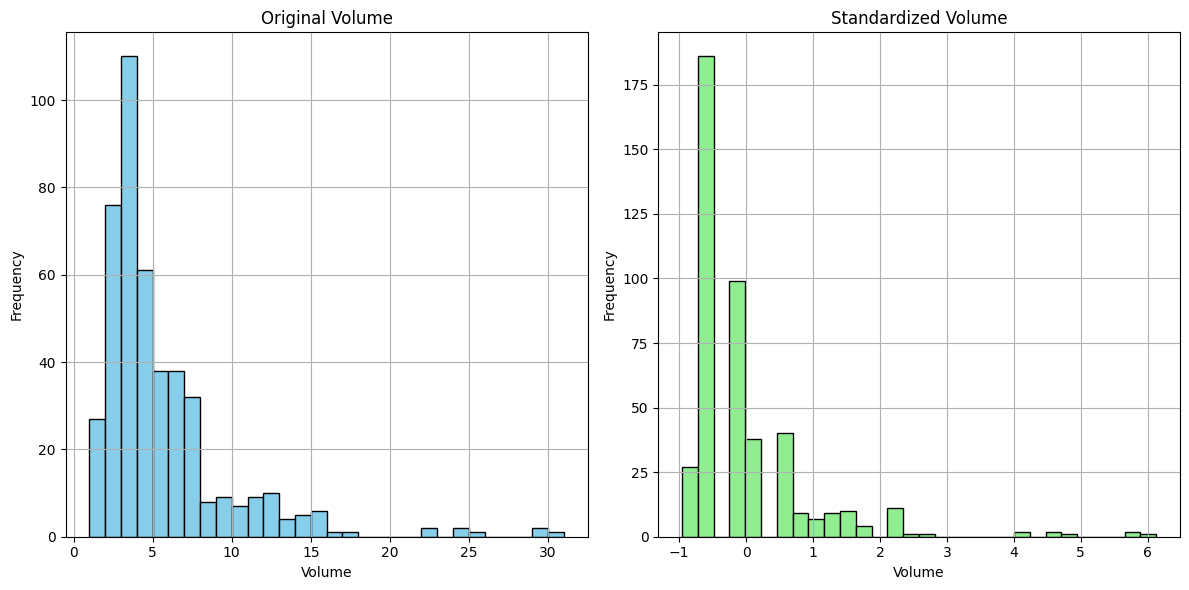

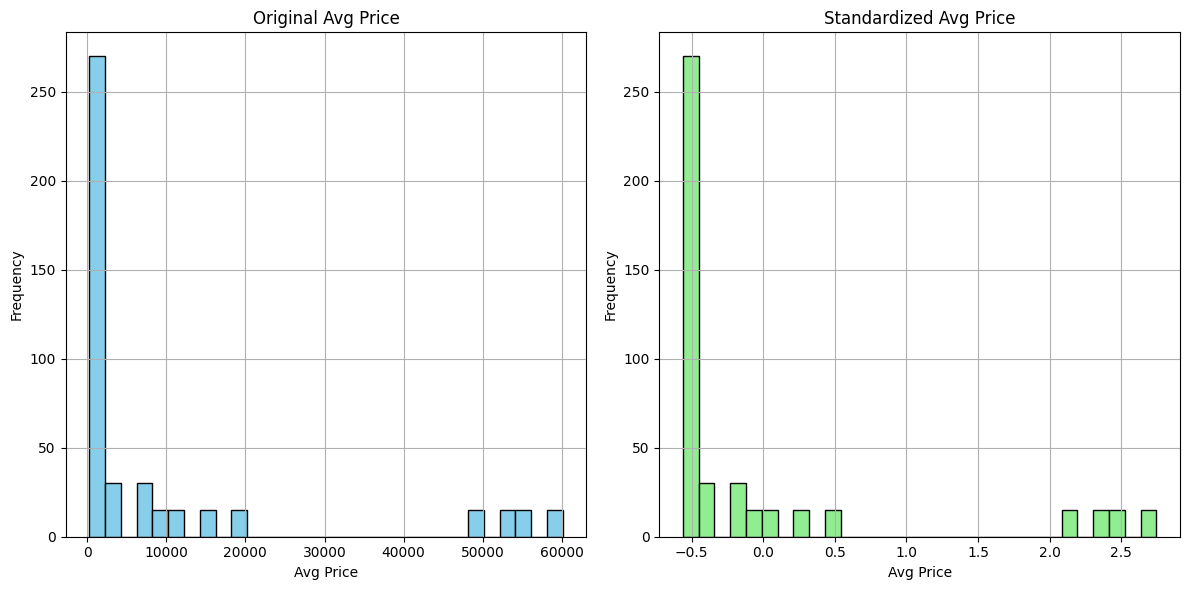

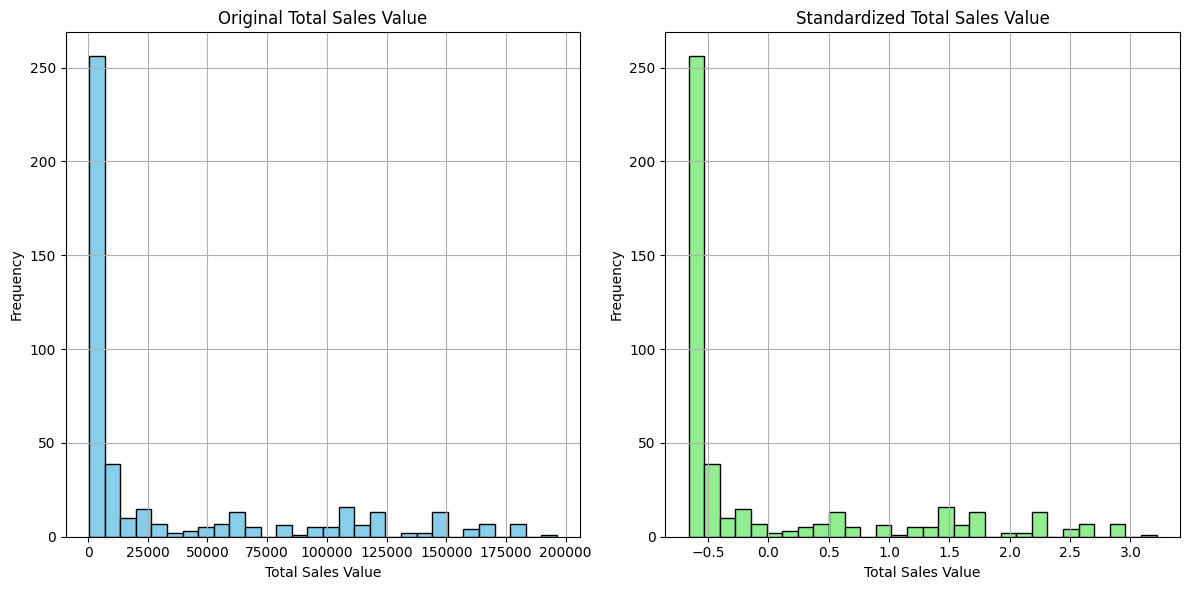

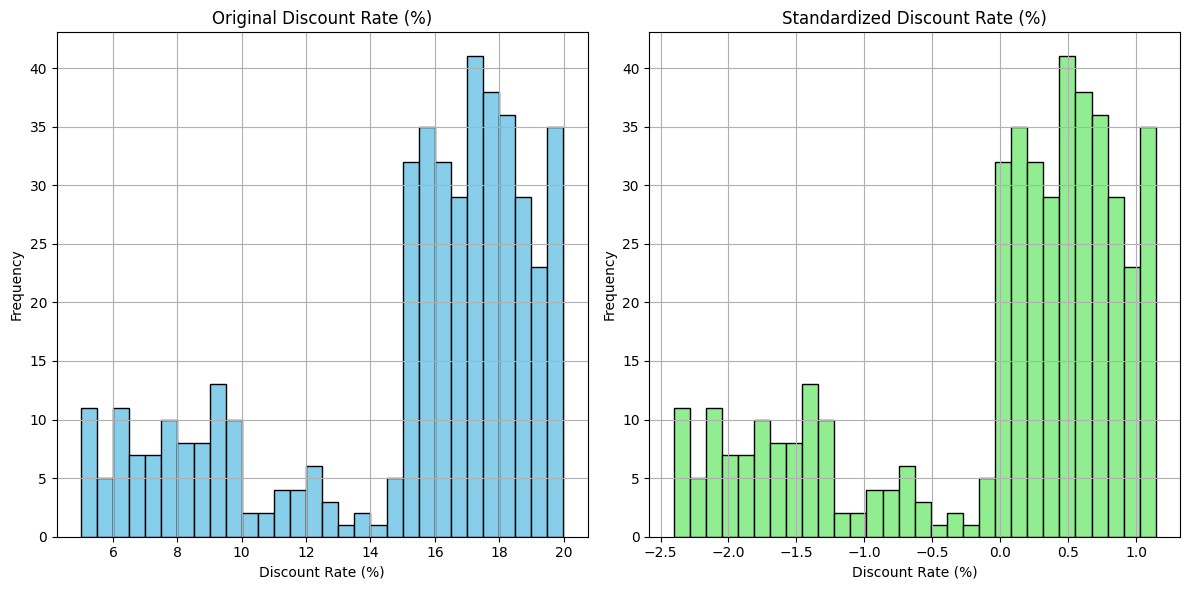

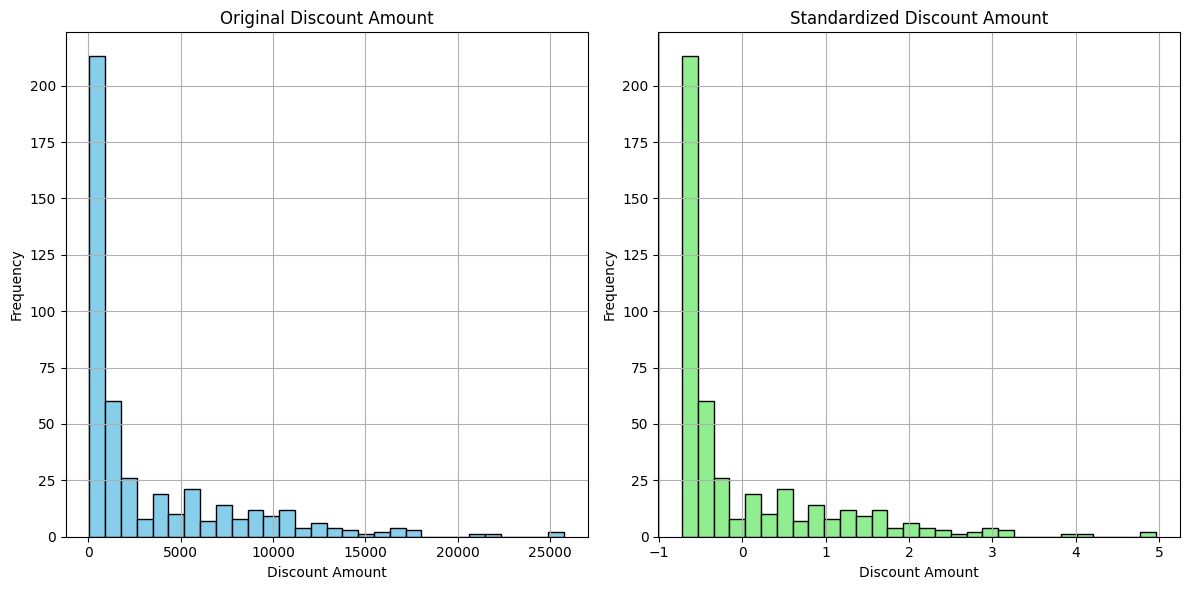

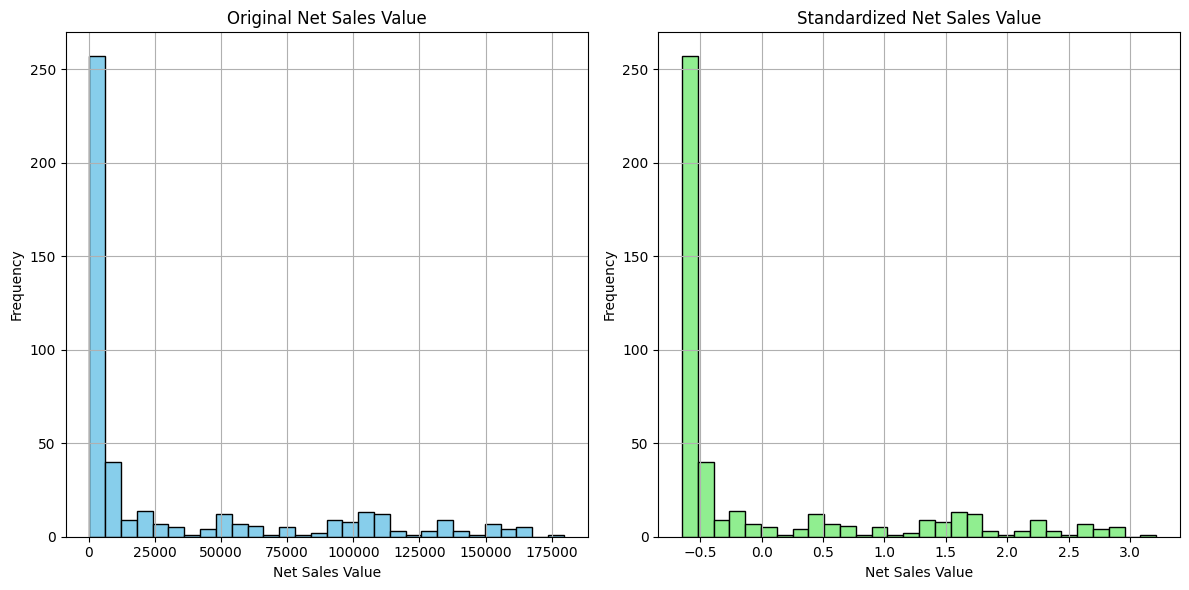

In [16]:
# Plot histograms before and after standardization for comparison
for column in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Original data
    plt.subplot(1, 2, 1)
    plt.hist(sales[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Original {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Standardized data
    plt.subplot(1, 2, 2)
    plt.hist(standardized_data[column], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Standardized {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Conversion of Categorical Data into Dummy Variables

For machine learning algorithms, one-hot encoding transforms categorical input into dummy variables to ensure correct operation and prevent biassed predictions. By creating distinct binary columns for every category, this method improves the model's interpretability and compatibility with a wider range of algorithms. Additionally, it stops erroneous comparisons or false orders in nominal or ordinal data.

In [21]:
# Identify the categorical columns
categorical_columns = sales.select_dtypes(include=['object']).columns
print('Categorical Columns:')
print(categorical_columns)

Categorical Columns:
Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [23]:
# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(sales, columns=categorical_columns)

# Display the first few rows of the transformed dataset
print('Transformed Data (with dummy variables):')
print(df_encoded.head())

Transformed Data (with dummy variables):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  M

In [24]:
# Display a portion of the transformed data
print('Transformed Data (first 5 rows):')
print(df_encoded.head())

Transformed Data (first 5 rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Ved

The data analysis revealed key patterns in sales figures, with certain product categories driving most revenue and others lagging. Seasonal peaks in sales, especially during certain months, suggest timing promotions around these periods could be beneficial. Outliers included unusually high discounts that didn't correlate with significant sales increase, and strong correlations between discount levels and sales volume. Comparing performance across regions revealed that certain areas consistently outperform others, suggesting opportunities for targeted marketing efforts. Visualizations like bar charts and heatmaps helped identify areas of improvement and highlight areas for improvement.

Data preprocessing is a crucial step in data analysis and machine learning.

**Standardization:**
*   Scales numerical features to have zero mean and unit variance
*   Ensures all features contribute equally to model training
* Improves convergence speed for many algorithms
* Particularly important for distance-based methods and neural networks

**One-hot encoding:**
*   Converts categorical variables into a numerical format
*   Creates binary columns for each category
* Prevents models from assuming ordinal relationships between categories
* Essential for algorithms that can't handle categorical data directly

**These techniques help prepare data for analysis and modeling by:**
* Making features comparable
*   Reducing bias towards certain features
*   Improving model performance and stability
*  Enabling algorithms to work with different data types